In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
import seeg_library as slib
import seeg_constants as CONST
import seaborn as sns

In [44]:
# Constants
patient = 'p13'
analysisType = "behavior"  # On what even to align stroop tasks. Choose "start" (trial start), "stim" (stimulus onset), or "key" (keypress)

In [45]:
csv_path = "behavior/" +  patient + "_rutledge_" + analysisType + "_run"

In [46]:
#Combine runs
df_lst = []
for i in range (3):
    print(i)
    experiment = str(i+1) 
    path_csv = csv_path + experiment + ".csv"
    df = pd.read_csv(path_csv)
    df_lst.append(df)
combined_df = pd.concat(df_lst, ignore_index=True)
combined_df.to_csv('combined_rutledge_behavior.csv', index=False)

0
1
2


# Visualization

In [47]:
#String-to-float conversion method
def time_string_to_seconds(time_str):
    if time_str.count(':') == 2:
        # Format HH:MM:SS.SSSS
        h, m, s = map(float, time_str.split(':'))
        return h * 3600 + m * 60 + s
    elif time_str.count(':') == 1:
        # Format MM:SS.S
        m, s = map(float, time_str.split(':'))
        return m * 60 + s
    else:
        raise ValueError("Time format not recognized")

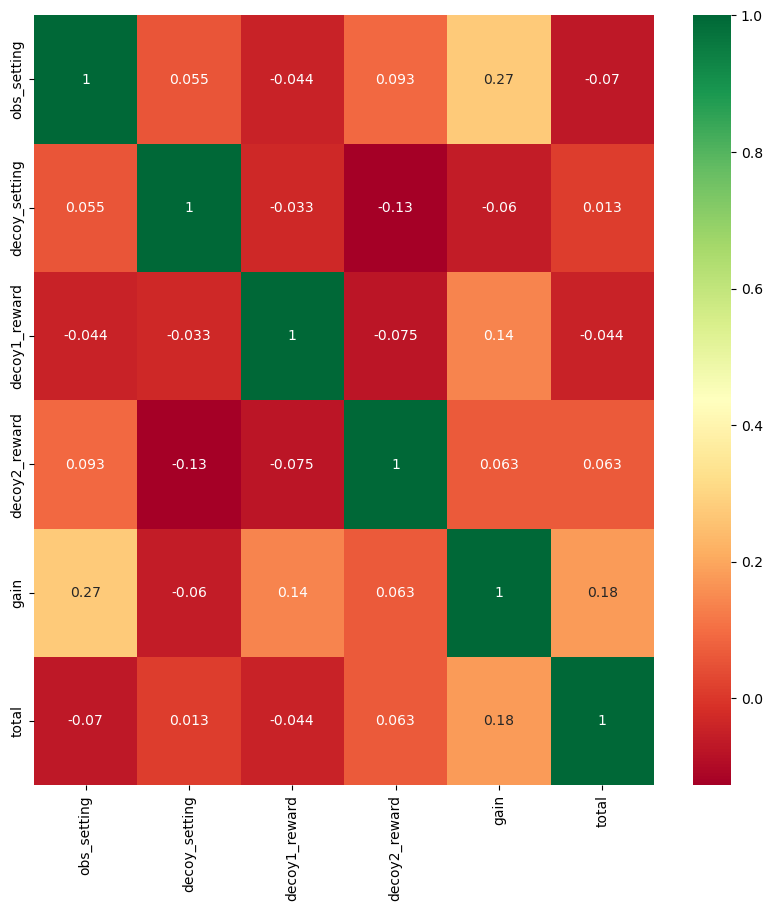

In [28]:
#Correlation Analysis/Relationships between variables using seaborn library
corrmat = combined_df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize = (10, 10))
#plot heat map
g=sns.heatmap(combined_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

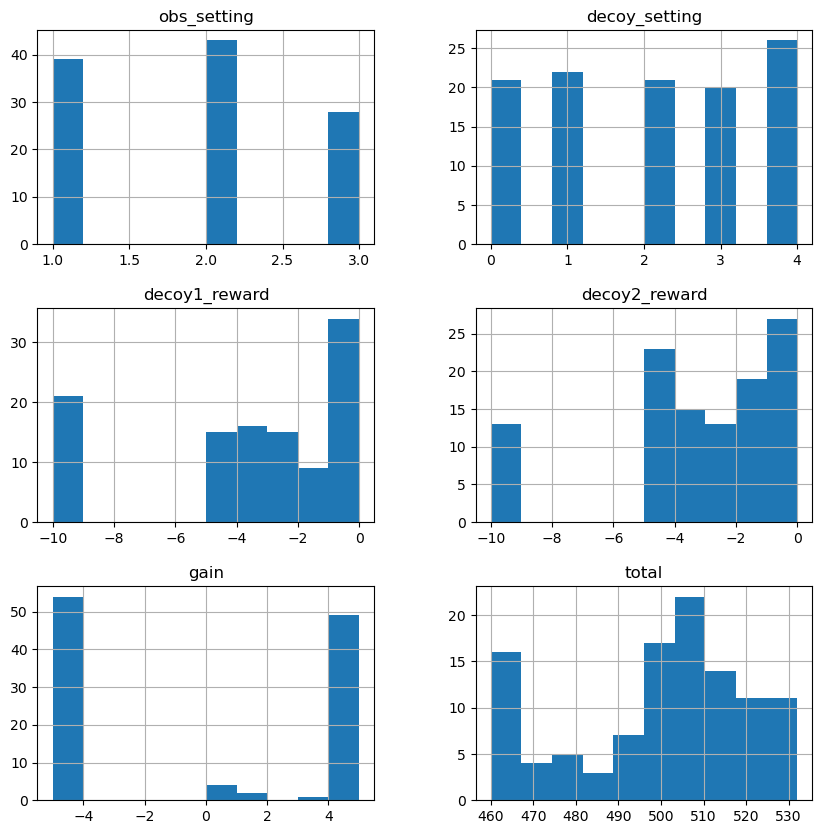

In [29]:
combined_df.hist(bins=10, figsize=(10, 10))
plt.show()

In [48]:
combined_df['choice_bin'] = None

for i in range(len(combined_df)):
    if combined_df['choice'].iloc[i] == 'Observation':
        combined_df['choice_bin'].iloc[i] = 0 
    elif combined_df['choice'].iloc[i] == 'Decoy':
        combined_df['choice_bin'].iloc[i] = 1

/var/folders/_9/b52xzjr17jg846fw21mn42tr0000gn/T/ipykernel_24593/3267799947.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df['choice_bin'].iloc[i] = 0
/var/folders/_9/b52xzjr17jg846fw21mn42tr0000gn/T/ipykernel_24593/3267799947

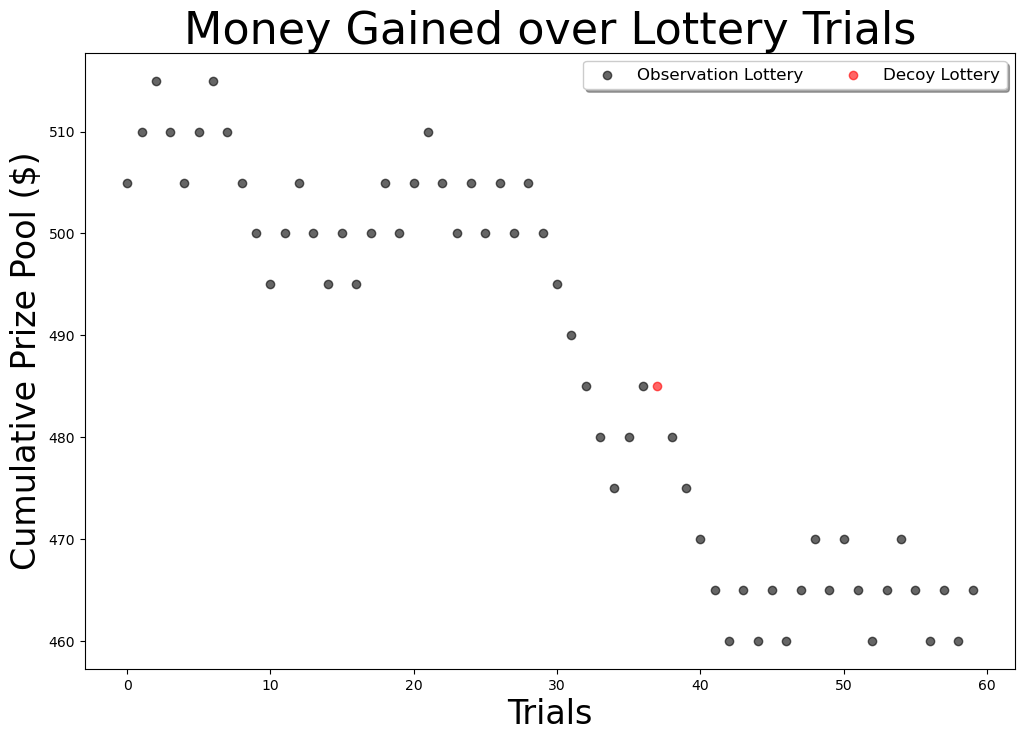

In [49]:
# Create a color map
colors = {0: 'black', 1: 'red'}

# Subset the DataFrame to include only the first 60 trials
subset_df = combined_df.head(60)

# Create a plot
plt.figure(figsize=(12, 8))

# Plot the points with colors based on the choice_bin
for decoy in subset_df['choice_bin'].unique():
    subset = subset_df[subset_df['choice_bin'] == decoy]
    plt.scatter(subset.index, subset['total'],
                c=colors[decoy],
                alpha=0.6,
                label=f'Delay {decoy}')

# Add labels and title
plt.xlabel('Trials', fontsize = 24)
plt.ylabel('Cumulative Prize Pool ($)', fontsize = 24)
plt.title('Money Gained over Lottery Trials', fontsize = 32)

# Customize the legend with specific labels
plt.legend(
    loc='best',          # Automatically find the best location
    fontsize='large',    # Set the font size
    frameon=True,        # Show the frame
    shadow=True,         # Add a shadow to the legend
    ncol=2,              # Two columns in the legend
    labels=['Observation Lottery', 'Decoy Lottery']  # Custom labels
)

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


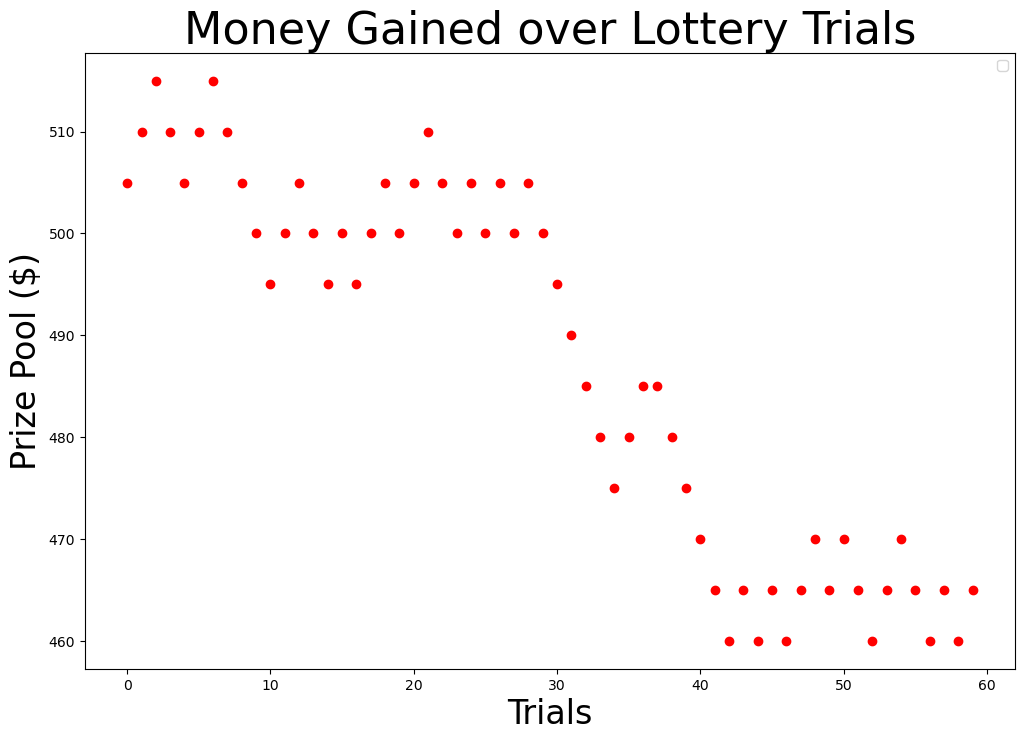

In [ ]:
plt.figure(figsize=(12, 8))  # Optional: set the size of the figure
for i in range(60):
    plt.scatter(i, combined_df['total'].iloc[i], c='red')

# Add labels and title
plt.xlabel('Trials', fontsize  = 24)
plt.ylabel('Prize Pool ($)', fontsize  = 24)
plt.title('Money Gained over Lottery Trials', fontsize  = 32)

# Add a legend
plt.legend()

# Show the plot
plt.show()